In [24]:
import pandas as pd
import numpy as np

In [25]:
cars = pd.read_csv('carprices.csv')
cars.head()

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<Figure size 1600x600 with 0 Axes>

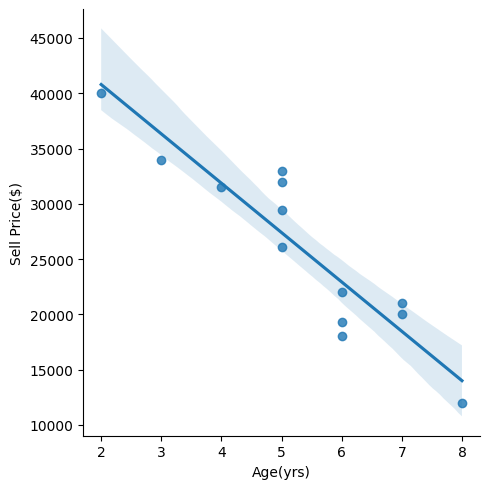

In [27]:
plt.figure(figsize=(16,6))
sns.lmplot(x='Age(yrs)', y='Sell Price($)', data=cars)

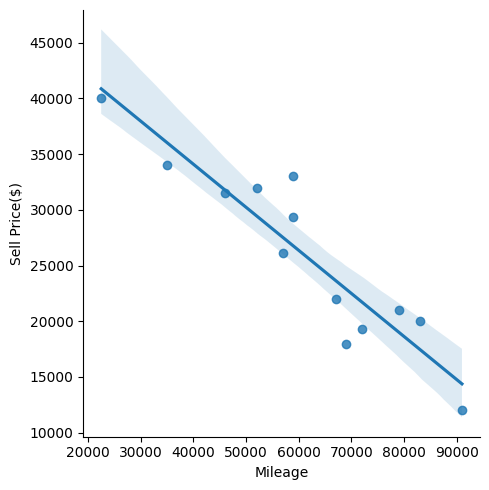

In [28]:
sns.lmplot(x='Mileage', y='Sell Price($)', data=cars)

USING PANDAS DUMMIES

In [29]:
dummies=pd.get_dummies(cars['Car Model'])
merged = pd.concat([cars,dummies],axis='columns')
merged.head()

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0


In [30]:
final_cars = merged.drop(['Car Model','Mercedez Benz C class'],axis='columns')
final_cars.head()

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression()

x = final_cars.drop('Sell Price($)',axis='columns')
y = final_cars['Sell Price($)']

x_train,x_test,y_train,y_test=train_test_split(x.values,y,test_size=0.2)

model.fit(x_train,y_train)
model.predict(x_test)
model.score(x_test,y_test)

model.predict([[45000,4,0,0]])
model.predict([[86000,7,0,1]])


array([8091.09513099])

WITH ONE_HOT_ENCODER

In [82]:
new_cars = cars.copy()
x = new_cars[['Car Model', 'Mileage', 'Age(yrs)']].values
y = new_cars['Sell Price($)']

In [83]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

model_OHE = ColumnTransformer(
    [('OHE', OneHotEncoder(),[0])],
    remainder = 'passthrough'
    )
dummified = model_OHE.fit_transform(x)
x = dummified[:, 1:]

model.fit(x,y)
model.predict([[1,0,8600,7]])

array([39728.19323786])